# Exercise-Time Series Analysis

Please retrieve daily closing stock price of AT&T using `yahoo finance`. Then, do the following tasks:
    
Question 1. Analyze the descriptive statistics, draw line plot and explain your first impression about the stationarity of the data. (20 pts)

Question 2. Check the stationarity of the data using acf, pacf, and adf test and interpret if it is stationary.(20 pts)

Question 3. If the series is not stationary, please make it stationary.(20 pts)

Question 4. Model the series using moving average model with an optimum lag.(20 pts)

Questions 5. Visualize the result using original data and predictions in a single plot.(20 pts)

In [73]:
# codes here
# retrieve daily closing stock price of AT&T using yahoo finance
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
import itertools
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
from statsmodels.tsa.arima_model import ARIMA

In [52]:
stock = 'T'
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 1, 1)
t_close = yf.download(stock, start = start, end = end, interval = '1d')['Close']

[*********************100%***********************]  1 of 1 completed


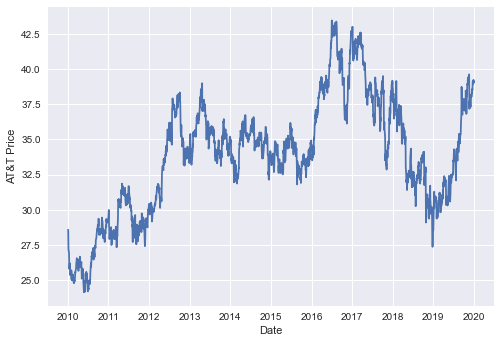

In [53]:
#Analyze the descriptive statistics, draw line plot and explain your first impression about the stationarity of the data.
plt.plot(t_close)
plt.xlabel('Date')
plt.ylabel('AT&T Price')
plt.show()

It seems that the data is non-stationary - there's been a general upward trend from the 2010 period onward - it looks at least *somewhat* similar to the blackrock example in class.

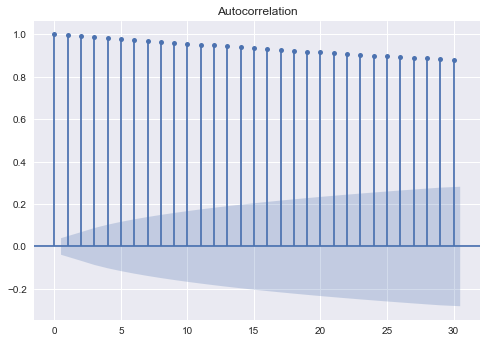

In [54]:
#Check the stationarity of the data using acf, pacf, and adf test and interpret if it is stationary.
sm.graphics.tsa.plot_acf(t_close, lags = 30)
plt.show()

Just like in the Blackrock example, it seems that acf is decaying (although faster in this case), which indicates non-stationarity

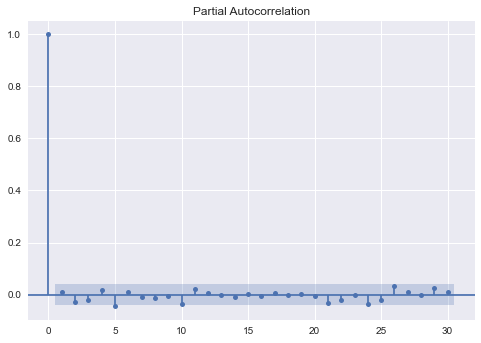

In [55]:
diff_t_close = t_close.diff().dropna()
sm.graphics.tsa.plot_pacf(diff_t_close, lags = 30)
plt.show()

The PACF seems to show an extremely minor spike at 5, and close to one at 10.

In [56]:
stat_test = adfuller(t_close)[0:2]
print("The test statistic and p-value of ADF test are {}".format(stat_test))

The test statistic and p-value of ADF test are (-2.221276106656852, 0.19861427197158038)


While the results are somewhat visually reflective of the Blackrock example in class, it seems far less stationary by comparison, as the magnitudes of the change is greater

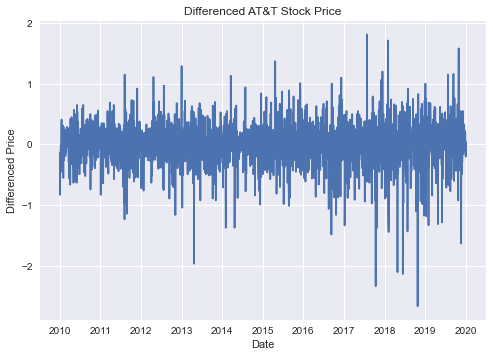

In [57]:
#If the series is not stationary, please make it stationary.
plt.plot(diff_t_close)
plt.title('Differenced AT&T Stock Price')
plt.ylabel('Differenced Price')
plt.xlabel('Date')
plt.show()

In [61]:
# Model the series using moving average model with an optimum lag.
p = q = range(0,5) #trying 5 because of the PACF
pq = list(itertools.product(p, q))
arma_results_t = []
for param_set in pq:
    try:
        arma_t = ARMA(diff_t_close.values, order = param_set)
        arma_fitted_t = arma_t.fit()
        arma_results_t.append(arma_fitted_t.aic)
        print('--' * 15)
        print('ARMA parameters are:{} & AIC value is:{}'.format(param_set, arma_fitted_t.aic))
    except:
        continue
print('==' * 15)
print('The Lowest AIC score is {:.4f} and the corresponding parameters are {}'.format(pd.DataFrame(arma_results_t).where(pd.DataFrame(arma_results_t).T.notnull().all()).min()[0],
                                                                                      pq[arma_results_t.index(min(arma_results_t))]))

------------------------------
ARMA parameters are:(0, 0) & AIC value is:2048.3392511366137
------------------------------
ARMA parameters are:(0, 1) & AIC value is:2049.9844567259215
------------------------------
ARMA parameters are:(0, 2) & AIC value is:2049.922619245607
------------------------------
ARMA parameters are:(0, 3) & AIC value is:2050.6178336145385
------------------------------
ARMA parameters are:(0, 4) & AIC value is:2051.77056766868
------------------------------
ARMA parameters are:(1, 0) & AIC value is:2050.0053146076743
------------------------------
ARMA parameters are:(1, 1) & AIC value is:2049.260237417754
------------------------------
ARMA parameters are:(1, 2) & AIC value is:2049.806302138728
------------------------------
ARMA parameters are:(1, 3) & AIC value is:2049.487414420162
------------------------------
ARMA parameters are:(1, 4) & AIC value is:2050.7974232814568
------------------------------
ARMA parameters are:(2, 0) & AIC value is:2049.78033872

In [89]:
#using (0, 0) results in a straight line, so I'll take the next best
arma_t = ARMA(diff_t_close, order = (2, 3))
arma_fitted_t = arma_t.fit()

In [90]:
arma_predictions_t = arma_fitted_t.predict(start = len(diff_t_close[:-50]),
                                           end = len(diff_t_close[:-50]) + len(diff_t_close[-50:]) - 1,
                                           dynamic = False)

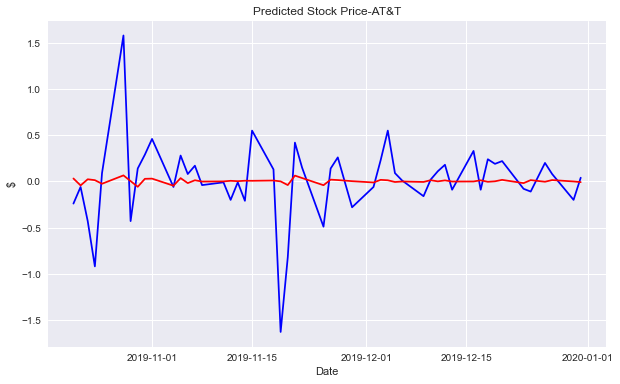

In [91]:
plt.figure(figsize=(10,6))
plt.plot(diff_t_close[-50:], label = 'Actual Stock Price', c = 'b')
plt.plot(arma_predictions_t, c = 'r')
plt.title('Predicted Stock Price-AT&T')
plt.xlabel('Date')
plt.ylabel('$')
plt.show()

Doesn't seem to be very predictive at all...
I'll try ARIMA?

In [78]:
p = q = range(0, 5)
d = range(0, 3)
pdq = list(itertools.product(p, d, q))
arima_results_t = []
for param_set in pdq:
    try:
        arima_t = ARIMA(t_close, order = param_set)
        arima_fitted_t = arima_t.fit()
        arima_results_t.append(arima_fitted_t.aic)
        print('--' * 15)
        print('ARIMA parameters are:{} & AIC value is:{}'.format(param_set, arima_fitted_t.aic))
    except:
        continue
print('==' * 15)
print('The Lowest AIC score is {:.4f} and the corresponding parameters are {}'
      .format(pd.DataFrame(arima_results_t).where(pd.DataFrame(arima_results_t).T.notnull().all()).min()[0],
              pdq[arima_results_t.index(min(arima_results_t))]))

------------------------------
ARIMA parameters are:(0, 0, 0) & AIC value is:14264.16295329211
------------------------------
ARIMA parameters are:(0, 0, 1) & AIC value is:11086.529899219899
------------------------------
ARIMA parameters are:(0, 0, 4) & AIC value is:6031.8975415835785
------------------------------
ARIMA parameters are:(0, 1, 0) & AIC value is:2048.3392511366137
------------------------------
ARIMA parameters are:(0, 1, 1) & AIC value is:2049.9844567259215
------------------------------
ARIMA parameters are:(0, 1, 2) & AIC value is:2049.922619245607
------------------------------
ARIMA parameters are:(0, 1, 3) & AIC value is:2050.6178336145385
------------------------------
ARIMA parameters are:(0, 1, 4) & AIC value is:2051.77056766868
------------------------------
ARIMA parameters are:(0, 2, 0) & AIC value is:3761.8728883947015
------------------------------
ARIMA parameters are:(0, 2, 1) & AIC value is:2058.356319816892
------------------------------
ARIMA paramete

In [85]:
#using 0, 0, 3 gives an error (there isn't a value at 0, 0, 3), it looks like it's meaning to say (0, 1, 0)? That's the only one that rounds to 2048.3393
#Even so, it's another one that results in a straight line, so I'll use the next lowest, (2, 1, 3)
arima_t = ARIMA(t_close, order = (2, 1, 3))
arima_fitted_t = arima_t.fit()

In [86]:
arima_predictions_t = arima_fitted_t.predict(start=len(t_close[:-50]), 
                                             end=len(t_close[:-50]) + len(t_close[-50:]) - 1,
                                             dynamic=False)

In [87]:
arima_predictions_t = pd.DataFrame(arima_predictions_t)
arima_predictions_t.index = t_close[-50:].index

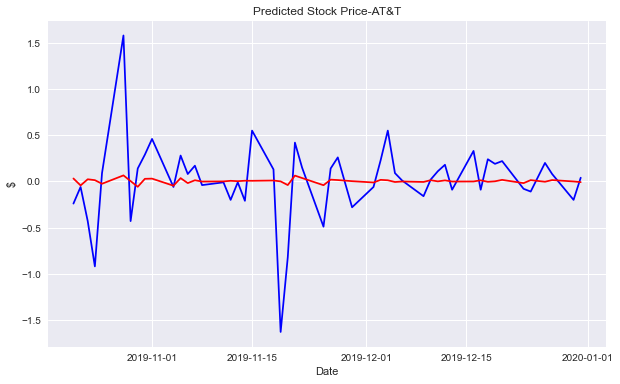

In [88]:
# Visualize the result using original data and predictions in a single plot.
plt.figure(figsize=(10,6))
plt.plot(diff_t_close[-50:], label = 'Actual Stock Price',c = 'b')
plt.plot(arima_predictions_t,c = 'r')
plt.title('Predicted Stock Price-AT&T')
plt.xlabel('Date')
plt.ylabel('$')
plt.show()

Doesn't seem much better. Using SARIMA seems wrong, as the data doesn't look seasonal